# Análisis Exploratorio de Comentarios de Facebook

## Cargar el archivo
Se extrajeron 1,569 comentarios de septiembre y octubre año 2020 en los que se menciona a CitiBanamex


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
import re
import nltk
stop_words_sp = set(stopwords.words('spanish'))

In [2]:
#nltk.download('stopwords')
#nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fnivasquezg/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fnivasquezg/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df = pd.read_csv('../data/BanamexFace.csv')
df.head()

pub              usr  likes  \
0  20200805  Dayana Tinajero     18   
1  20200805     Salma Madrid      5   
2  20200805  Dayana Tinajero      3   
3  20200805    Lissy Jimenez      0   
4  20200805    Lissy Jimenez      0   

                                                 com         fec       hor  \
0  no inventen, acabo de llamar al call center y ...  2020-08-06  11:37:00   
1  pesimo servicio de call center, contestan con ...  2020-08-06  12:56:00   
2  mejor voy a sucursal, ya no me da confianza na...  2020-08-06  13:20:00   
3  citibanamex podrían decirme dónde puedo llamar...  2020-08-06  16:04:00   
4  citibanamex gracias si me gustaría saber cuand...  2020-08-06  16:23:00   

  sent            tag  
0    n      seguridad  
1    n  atencion_call  
2    n      seguridad  
3    o       consulta  
4    o       consulta

### Removiendo los signos de puntuación

In [5]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [7]:
df['com'] = df['com'].apply(lambda x: remove_punct(x))
df.head()

pub              usr  likes  \
0  20200805  Dayana Tinajero     18   
1  20200805     Salma Madrid      5   
2  20200805  Dayana Tinajero      3   
3  20200805    Lissy Jimenez      0   
4  20200805    Lissy Jimenez      0   

                                                 com         fec       hor  \
0  no inventen acabo de llamar al call center y m...  2020-08-06  11:37:00   
1  pesimo servicio de call center contestan con v...  2020-08-06  12:56:00   
2  mejor voy a sucursal ya no me da confianza nad...  2020-08-06  13:20:00   
3  citibanamex podrían decirme dónde puedo llamar...  2020-08-06  16:04:00   
4  citibanamex gracias si me gustaría saber cuand...  2020-08-06  16:23:00   

  sent            tag  
0    n      seguridad  
1    n  atencion_call  
2    n      seguridad  
3    o       consulta  
4    o       consulta

### Unimos todos los comentarios en un documento único

In [9]:
stop_words_sp

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [10]:
text = " ".join([term.lower() for term in df.com if term not in stop_words_sp])

In [13]:
import wordcloud
from wordcloud import WordCloud
wc= WordCloud(max_words=100, stopwords=stop_words_sp,
              background_color="white", colormap="Dark2",
              max_font_size=50, random_state=6)

plt.figure(figsize=(16, 9))
wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

### Agregamos un Diagrama de Barras para una mejor representación

In [14]:
from nltk.tokenize import word_tokenize
fdist = nltk.FreqDist(word.lower() for word in word_tokenize(text) if word not in stop_words_sp)

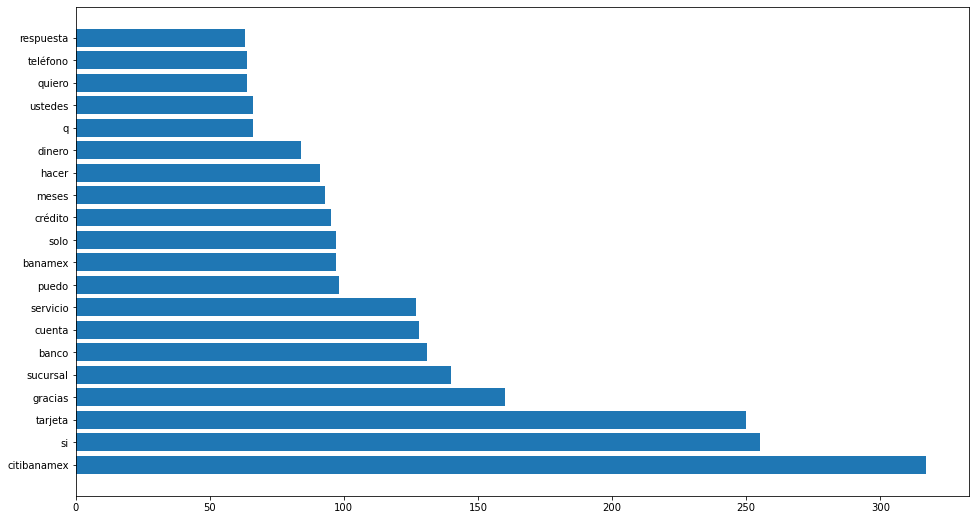

In [15]:
y = list(range(20))
top_words, counts = zip(*fdist.most_common(20))
plt.figure(figsize=(16, 9))
plt.barh(y, counts)
plt.yticks(y, top_words)
plt.show()